In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1 - Problem Definition**

Create an ML model that can predict house prices effectively.

# **2 - Build Dataset**

## **Data Collection**

In [81]:
houses_df=pd.read_csv('house_prices.csv')

In [82]:
copy_df=houses_df.copy()

1-Supervised Type of Data (Data with Target Variable)
2-Unsupervised Type of Data (Data with no Target Variable)

### **Problem Type**

We are given target feature 'SalesPrice'. So, this is supervised machine learning problem

## **Data Inspection**

1- Check inconsistency in the data
2- Outliers
3- Data Transformation
4- Fill missing values

### **Null Values**

In [83]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df
statistics(houses_df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
PoolQC,3,1453,99.520548,object
MiscFeature,4,1406,96.301370,object
Alley,2,1369,93.767123,object
Fence,4,1179,80.753425,object
FireplaceQu,5,690,47.260274,object
LotFrontage,110,259,17.739726,float64
GarageType,6,81,5.547945,object
GarageYrBlt,97,81,5.547945,float64
GarageFinish,3,81,5.547945,object


### **Hanlding Missing Values**

In [84]:
# Create a list of columns to fill with 'NA' value
NA_columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

# Fill 'NA' value in selected columns
houses_df[NA_columns] = houses_df[NA_columns].fillna(value="NA")

In [85]:
# Create a list of column to fill with their most common value (mcv)
mcv_columns = ['MasVnrArea','Electrical']
# Fill missing values with the most common value in each column
for col in mcv_columns:
     houses_df[col] = houses_df[col].fillna(value=houses_df[col].value_counts().index[0])

In [86]:
# Replace the missing values for the year the garage was built with the same year the house was constructed
houses_df['GarageYrBlt'].fillna(houses_df['YearBuilt'], inplace=True)

# Replace missing values of the 'Lot Frontage' colum with the mean of the column
houses_df['LotFrontage'].fillna(houses_df['LotFrontage'].mean(), inplace=True)

# Replace missing values with 'None' as for no mansonry veneer, like according to documentation.txt
houses_df['MasVnrType'].fillna(value="None", inplace=True)

# Replace the missing values for the mansonry veneer area with the mean of the column
houses_df['MasVnrArea'].fillna(houses_df['MasVnrArea'].mean(), inplace=True)

### Removing the Null values where their percentage is less than 10%

In [87]:
houses_df.dropna(axis=0,subset=['GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCond','BsmtCond','BsmtCond','BsmtExposure','BsmtFinType2','Electrical','GarageType'],inplace=True)

In [88]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df
statistics(houses_df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,


In [89]:
#houses_df['FireplaceQu'].fillna('Gd',inplace=True)

In [90]:
#houses_df['Fence'].fillna('MnPrv',inplace=True)

In [91]:
#houses_df['PoolQC'].fillna('Gd',inplace=True)

In [92]:
#plt.figure(figsize=(16,9))
#for i,var in enumerate(['FireplaceQu']):
 #   plt.subplot(4,3,i+1)
  #  plt.hist(houses_df[var],label="Impute")
   # plt.hist(copy_df[var].dropna(),label="Original")
    #plt.legend()

In [93]:
null_val_feat=[]

In [94]:
for feature in copy_df.select_dtypes(np.object).columns:
    if copy_df[feature].isnull().sum()/houses_df.shape[0]*100>=0:
        null_val_feat.append(feature)
       # print(null_val_feat)

<ipython-input-94-0ed57b346c17>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for feature in copy_df.select_dtypes(np.object).columns:


In [95]:
len(null_val_feat)

43

### Results after Missing vale Imputations

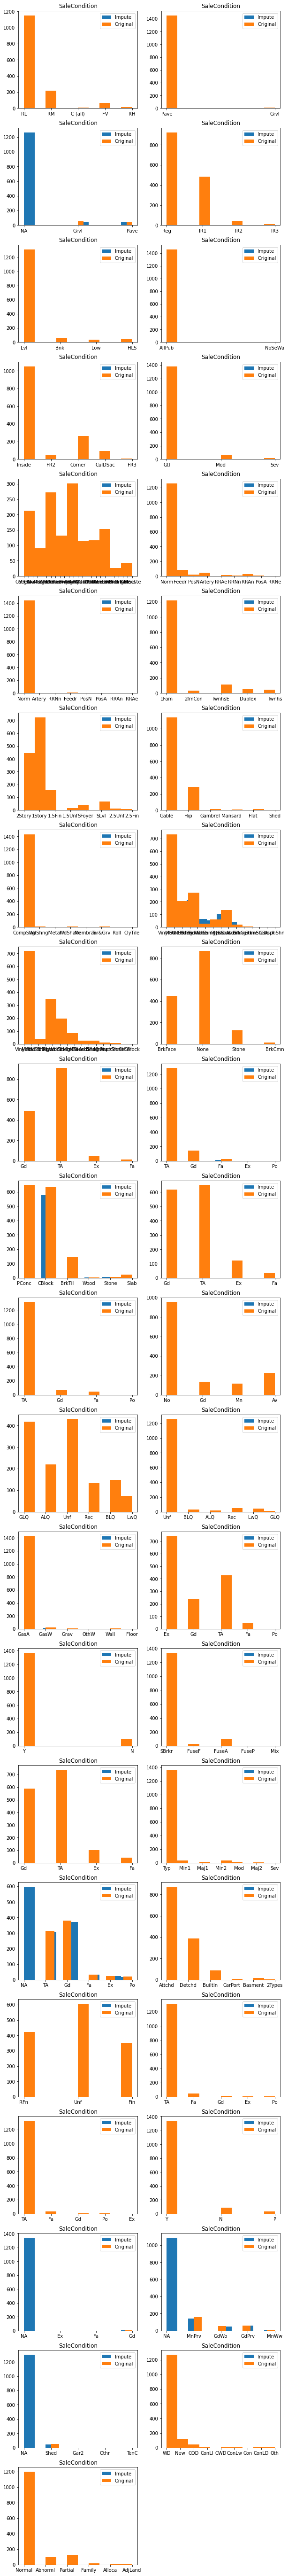

In [96]:
#plt.figure(figsize=(16,9))
plt.figure(figsize=(10,100))
for i,var in enumerate(null_val_feat):
    plt.subplot(22,2,i+1)
    plt.hist(houses_df[var],label="Impute")
    plt.hist(copy_df[var].dropna(),label="Original")
    plt.title(feature)
    plt.legend()

### Cleaned Data

In [97]:
import missingno as msno

<AxesSubplot:>

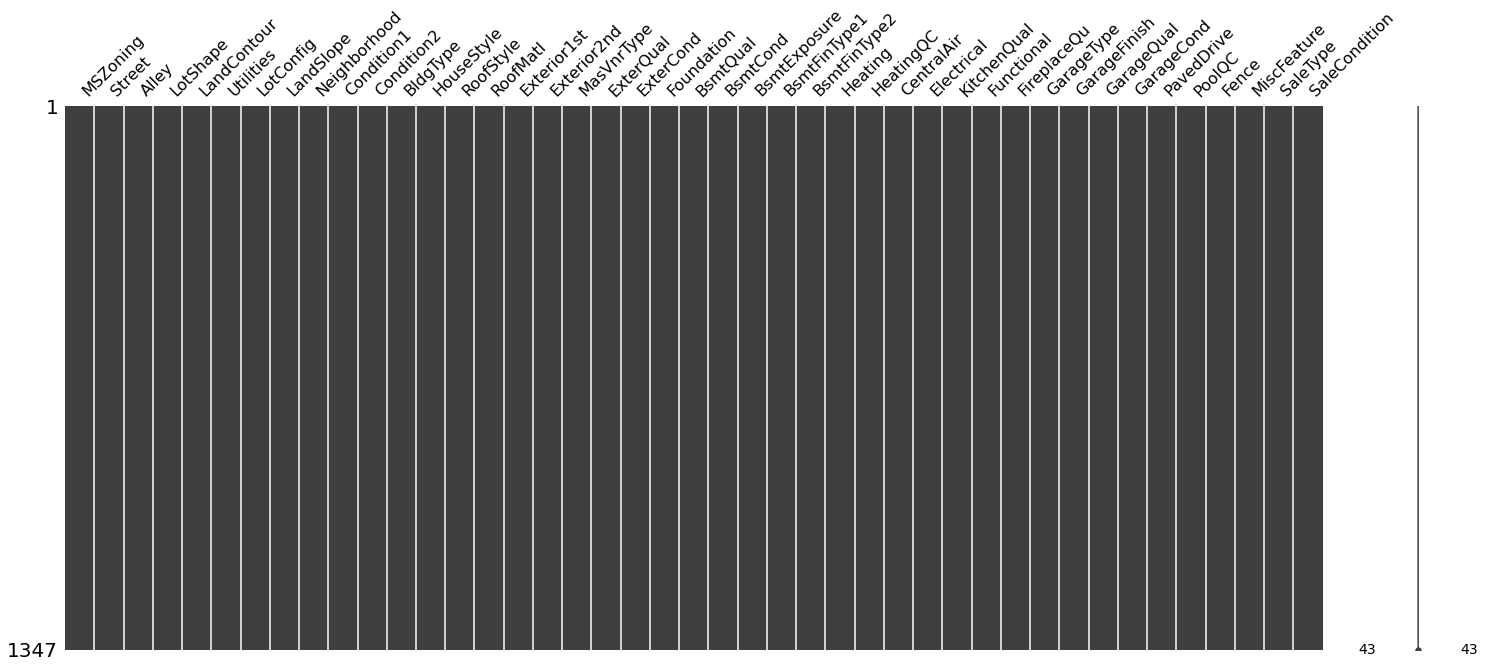

In [98]:
msno.matrix(houses_df[null_val_feat])

### **Summary Statistics**

### Shape of Data

In [99]:
houses_df.shape

(1347, 81)

### Dataset Statistics

In [100]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)
    
    # Displaying correlation of numerical features
    corr = df.corr(method="kendall").style.background_gradient("YlOrRd_r")
    print("Correlation of Numerical features....")
    display(corr)


In [101]:
perform_eda(houses_df)

EDA of  Data....
Size 109107
Columns 81
Records 1347
First Look of Data....


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Dataset has following Numerical columns...
 1) Id
 2) MSSubClass
 3) LotFrontage
 4) LotArea
 5) OverallQual
 6) OverallCond
 7) YearBuilt
 8) YearRemodAdd
 9) MasVnrArea
 10) BsmtFinSF1
 11) BsmtFinSF2
 12) BsmtUnfSF
 13) TotalBsmtSF
 14) 1stFlrSF
 15) 2ndFlrSF
 16) LowQualFinSF
 17) GrLivArea
 18) BsmtFullBath
 19) BsmtHalfBath
 20) FullBath
 21) HalfBath
 22) BedroomAbvGr
 23) KitchenAbvGr
 24) TotRmsAbvGrd
 25) Fireplaces
 26) GarageYrBlt
 27) GarageCars
 28) GarageArea
 29) WoodDeckSF
 30) OpenPorchSF
 31) EnclosedPorch
 32) 3SsnPorch
 33) ScreenPorch
 34) PoolArea
 35) MiscVal
 36) MoSold
 37) YrSold
 38) SalePrice


Dataset has following Categorical columns...
 1) MSZoning
 2) Street
 3) Alley
 4) LotShape
 5) LandContour
 6) Utilities
 7) LotConfig
 8) LandSlope
 9) Neighborhood
 10) Condition1
 11) Condition2
 12) BldgType
 13) HouseStyle
 14) RoofStyle
 15) RoofMatl
 16) Exterior1st
 17) Exterior2nd
 18) MasVnrType
 19) ExterQual
 20) ExterCond
 21) Foundation
 22) BsmtQual
 

<ipython-input-100-f4903b215c21>:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = df.select_dtypes(np.object).columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1347.000000,1347.000000,1347,1347.000000,1347.000000,1347,1347,1347,1347,1347,...,1347.000000,1347,1347,1347,1347.000000,1347.000000,1347.000000,1347,1347,1347.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,...,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,NA,Reg,Lvl,AllPub,...,NaN,NA,NA,NA,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1072,NaN,NaN,1342,1265,836,1215,1346,...,NaN,1340,1086,1298,NaN,NaN,NaN,1164,1109,NaN
mean,732.436526,56.102450,NaN,70.646095,10714.744618,NaN,NaN,NaN,NaN,NaN,...,2.990349,NaN,NaN,NaN,42.645880,6.334818,2007.806236,NaN,NaN,187042.790646
std,421.635397,41.203909,NaN,22.142057,10321.900187,NaN,NaN,NaN,NaN,NaN,...,41.821535,NaN,NaN,NaN,506.366941,2.702978,1.329298,NaN,NaN,79035.211770
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,35311.000000
25%,367.500000,20.000000,NaN,60.000000,7750.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,135000.000000
50%,732.000000,50.000000,NaN,70.049958,9600.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,169500.000000
75%,1099.500000,70.000000,NaN,80.000000,11757.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,220000.000000


Correlation of Numerical features....


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.013313,-0.022842,-0.006400,-0.027679,0.004050,-0.008646,-0.009515,-0.027740,-0.007239,-0.004106,-0.009625,-0.026509,0.000422,-0.001436,-0.024310,-0.003956,0.011447,-0.023371,0.001994,-0.010243,0.029654,0.008959,0.014525,-0.012473,-0.000099,0.006735,0.002410,-0.036891,-0.005640,-0.003232,-0.026111,0.003725,0.046893,-0.022251,0.015525,0.000844,-0.018701
MSSubClass,0.013313,1.000000,-0.204426,-0.199476,0.099429,-0.072157,0.027110,0.002840,0.024203,-0.078165,-0.079369,-0.087700,-0.252751,-0.218756,0.407876,0.053718,0.137560,-0.043013,0.005545,0.147401,0.268174,0.046654,0.196520,0.118497,0.034539,0.049441,0.041765,-0.025427,0.018712,0.032033,0.002727,-0.026617,-0.016253,0.032542,-0.031388,0.012928,-0.023069,0.002618
LotFrontage,-0.022842,-0.204426,1.000000,0.424599,0.175661,-0.050600,0.119865,0.069827,0.189945,0.103944,0.033444,0.055542,0.242940,0.266901,0.040571,-0.041793,0.227938,0.071213,-0.005330,0.166134,0.072886,0.234113,-0.000024,0.246622,0.177962,0.072672,0.261969,0.237290,0.073794,0.117787,-0.077805,0.044316,0.025350,0.066619,0.011172,0.016287,0.007445,0.270719
LotArea,-0.006400,-0.199476,0.424599,1.000000,0.158290,-0.027966,0.048008,0.038711,0.118412,0.113776,0.050628,0.042323,0.242331,0.301462,0.086275,-0.013576,0.303108,0.073333,0.031511,0.183012,0.103217,0.274962,0.001443,0.310130,0.271104,0.028523,0.248716,0.232706,0.124849,0.117824,-0.036441,0.050609,0.067693,0.070448,0.054901,0.000267,-0.021367,0.305043
OverallQual,-0.027679,0.099429,0.175661,0.158290,1.000000,-0.198443,0.508362,0.442665,0.313235,0.061897,-0.135410,0.186202,0.320710,0.309280,0.232901,-0.028996,0.462864,0.061524,-0.069297,0.541419,0.240164,0.086896,-0.125998,0.360885,0.340457,0.473614,0.534146,0.397381,0.190573,0.340475,-0.149765,0.025594,0.018364,0.048660,-0.077036,0.049220,-0.012937,0.662428
OverallCond,0.004050,-0.072157,-0.050600,-0.027966,-0.198443,1.000000,-0.358003,-0.067798,-0.154218,-0.026921,0.090690,-0.116618,-0.195207,-0.127748,-0.016769,0.031050,-0.133330,-0.070047,0.110554,-0.255862,-0.076829,0.011649,-0.077289,-0.091808,-0.049314,-0.308953,-0.263392,-0.179872,-0.047658,-0.138214,0.098190,0.026761,0.070088,-0.006050,0.096725,-0.008089,0.049246,-0.134609
YearBuilt,-0.008646,0.027110,0.119865,0.048008,0.508362,-0.358003,1.000000,0.650267,0.273679,0.121340,-0.118063,0.084205,0.280332,0.186984,0.016552,-0.093548,0.181569,0.111546,-0.071574,0.456042,0.182781,-0.048630,-0.122288,0.133116,0.104233,0.841972,0.491721,0.363107,0.188829,0.294427,-0.320644,0.015722,-0.078506,0.003704,-0.081203,0.008648,-0.006303,0.463347
YearRemodAdd,-0.009515,0.002840,0.069827,0.038711,0.442665,-0.067798,0.650267,1.000000,0.158952,0.027956,-0.123108,0.112057,0.197222,0.167923,0.041261,-0.042377,0.180545,0.066041,-0.040316,0.371020,0.109942,-0.065489,-0.125629,0.136835,0.070468,0.648768,0.396383,0.287139,0.155649,0.255107,-0.205812,0.035223,-0.050060,-0.000562,-0.071528,0.013225,0.033479,0.415468
MasVnrArea,-0.027740,0.024203,0.189945,0.118412,0.313235,-0.154218,0.273679,0.158952,1.000000,0.167464,-0.066527,0.043537,0.255732,0.257850,0.044433,-0.085807,0.234359,0.094780,0.019333,0.249227,0.133000,0.094387,-0.006797,0.215651,0.196762,0.218009,0.326726,0.249709,0.132327,0.161215,-0.154985,0.029957,0.023747,0.001821,-0.041544,0.007213,0.009321,0.296882
BsmtFinSF1,-0.007239,-0.078165,0.103944,0.113776,0.061897,-0.026921,0.121340,0.027956,0.167464,1.000000,0.015475,-0.464887,0.285117,0.245761,-0.157313,-0.058155,0.030102,0.562556,0.067360,0.003023,-0.040257,-0.079981,-0.034488,-0.038459,0.142239,0.056456,0.128529,0.163093,0.118384,0.052098,-0.123282,0.040877

1- Trends in data
2- Scale of data
3- Shape of data

IQR
Mean
Std
....

In [102]:
# Create a list of ordinal variables
ordinal = ['LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual',
           'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

# Create a list of nominal variables
nominal = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
           'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
           'CentralAir','GarageType','MiscFeature','SaleType','SaleCondition']

In [103]:
houses_df[nominal]

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NA,WD,Normal
1,20,RL,Pave,NA,Lvl,FR2,Veenker,Feedr,Norm,1Fam,...,MetalSd,MetalSd,None,CBlock,GasA,Y,Attchd,NA,WD,Normal
2,60,RL,Pave,NA,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NA,WD,Normal
3,70,RL,Pave,NA,Lvl,Corner,Crawfor,Norm,Norm,1Fam,...,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,Detchd,NA,WD,Abnorml
4,60,RL,Pave,NA,Lvl,FR2,NoRidge,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NA,Lvl,Inside,Gilbert,Norm,Norm,1Fam,...,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,NA,WD,Normal
1456,20,RL,Pave,NA,Lvl,Inside,NWAmes,Norm,Norm,1Fam,...,Plywood,Plywood,Stone,CBlock,GasA,Y,Attchd,NA,WD,Normal
1457,70,RL,Pave,NA,Lvl,Inside,Crawfor,Norm,Norm,1Fam,...,CemntBd,CmentBd,None,Stone,GasA,Y,Attchd,Shed,WD,Normal
1458,20,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,MetalSd,MetalSd,None,CBlock,GasA,Y,Attchd,NA,WD,Normal


In [104]:
# Ordinal variables with same rating method
cols_replace = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
                'GarageQual','GarageCond','PoolQC']
# Replacing all the variables above with values 0 (NA) to 5 (Exellent)
for col in cols_replace:
    houses_df[col].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}, inplace = True)

In [105]:
houses_df['BsmtExposure'].replace({'Ex':5,'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0},inplace = True)
houses_df['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},inplace = True)
houses_df['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},inplace = True)
houses_df['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0},inplace = True)
houses_df['PavedDrive'].replace({'Y':3,'N':2,'P':1,'NA':0},inplace = True)
houses_df['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0},inplace = True)
houses_df['Functional'].replace({'Typ':7,'Min2':6,'Min1':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'NA':0},inplace = True)
houses_df['Electrical'].replace({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1,'NA':0},inplace = True)
houses_df['BsmtExposure'].replace({'Mn':4,'Gd':3,'Av':2,'No':1,'NA':0},inplace = True)
houses_df['Utilities'].replace({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1},inplace = True)
houses_df['LotShape'].replace({'IR3':4,'IR2':3,'IR1':2,'Reg':1},inplace = True)
houses_df['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1},inplace = True)

In [106]:
houses_df = pd.get_dummies(houses_df, columns=nominal)

In [107]:
# Create a list of continuous variables
continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
              'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
              'ScreenPorch','PoolArea','MiscVal']

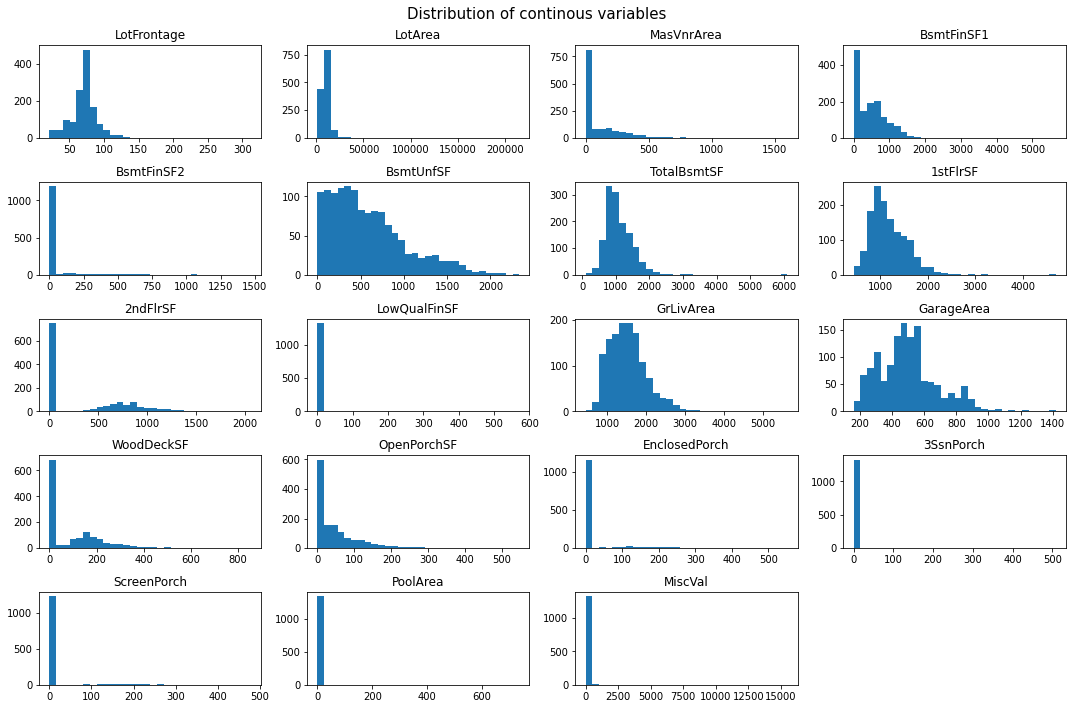

In [108]:
# Create a list of continuous variables
continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
              'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
              'ScreenPorch','PoolArea','MiscVal']

# Plot distribution of continuous variables
houses_df[continuous].hist(layout=(-1, 4), bins=30, grid=False, figsize=(15, 10));
plt.suptitle('Distribution of continous variables', size=15)
plt.tight_layout()
plt.show()

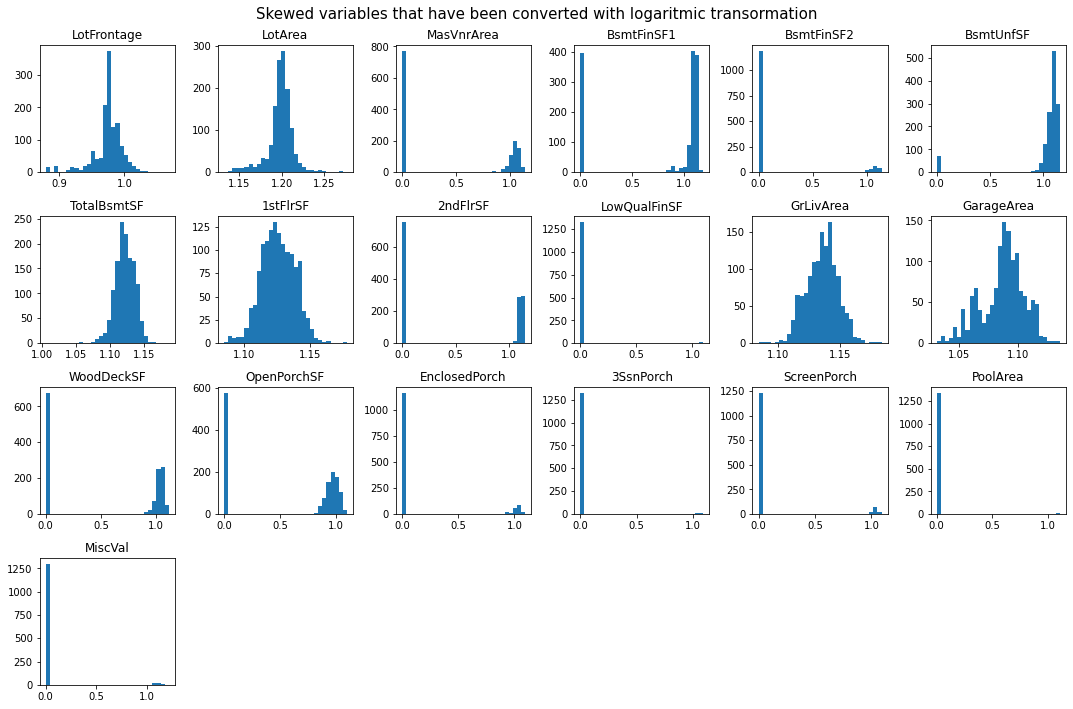

In [111]:
# Apply log-transformation to selected continous features
houses_df[continuous] = np.log1p(houses_df[continuous])

# Plot distribution of these continuous variables after the transformation
houses_df[continuous].hist(layout=(-1, 6), bins=30, grid=False, figsize=(15,10));
plt.suptitle('Skewed variables that have been converted with logaritmic transormation', size=15)
plt.tight_layout()
plt.show()

# **3 - Model Training**

### **splitting the Data**

-----------------------------Good Practice----------------------------------
1- 80% Training
2- 20% Testing

In [112]:
X=houses_df.drop(['SalePrice'],axis=1)
y=houses_df['SalePrice']

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor


# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))


train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    #print('Max errors : ', m_errors)
    #print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    #print('cross validation accuracy : ', np.mean(scores))
    #print("-"*50)


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  30729.788380724105
--------------------------------------------------
Mean absolute error (MAE) :  21369.17017291391
--------------------------------------------------
R2 score :  0.812008933388829
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.042 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean s

,Training Score,Testing Score,MAE,RMSE,R2 Score
0,0.88482,0.812009,21369.170173,30729.788381,0.812009
1,0.90453,0.767179,21705.279010,34198.101317,0.767179
